# Create Service Role for Lambda:
For instructions on how to create a service role, please refer to my AWS repo under [IAM/Roles/How to create an AWS Role using OneCloud AWS Access Management.ipynb](https://github.com/DataScientistMSBA/AWS/blob/main/IAM/Roles/How%20to%20create%20an%20AWS%20Role%20using%20OneCloud%20AWS%20Access%20Management.ipynb).

For this project, you will need to make sure to go into the IAM Roles and add permissions for SES. To do this, go to the **IAM** module in the AWS Console. Go ot the **Roles** section in from the left-hand menu and then search for the service name that you created earlier. Next, go to **Add permissions** and attach the below policies to the service role:
- AmazonSESFullAccess
- AWSLambdaExecute
- AmazonS3FullAccess

# Create a Lambda function:
For instructions on how to create a Lambda function, go to my AWS repo and read the following file: [Lambda/How to create a Lambda function.ipynb](https://github.com/DataScientistMSBA/AWS/blob/main/Lambda/How%20to%20create%20a%20Lambda%20function.ipynb)

Create a new Lambda function using the service role that you just created. Leave the triggers and underlying setting null for now

# Create a S3 Event Notification:

Now, you will need to go into the main bucket in your the **S3** module. Under the **main/root** bucket, click on **Properties** and scroll down to **Event Notification**. Then click ** Create event notification**.

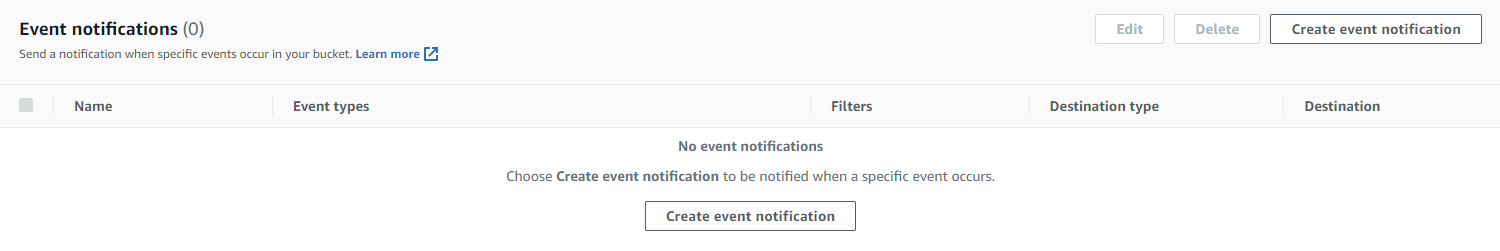

Under the **General configuration** section, enter a name for the event.

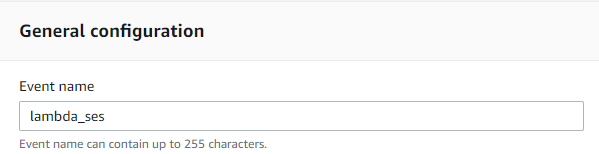

It is very likely that you need to also enter a **Prefix** to focus down onto a particular subdirectory in the S3 bucket. To do this, enter the S3 directory that you're focusing on in the **Prefix** piece under the **General configuration** section.

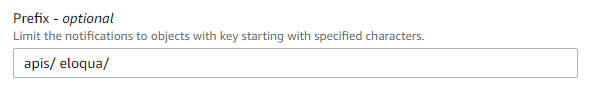

Scroll down to the **Event types** section and for this particular build, just toggle the **Put** object creation option.

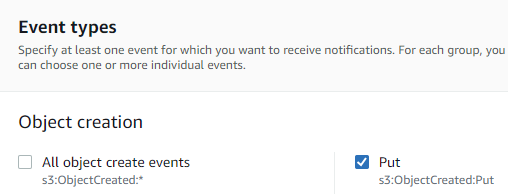

Scroll down the bottom of the page to the **Destination** section and make sure that the Destination is toggled to **Lambda function** and that you have chosen the Lambda function created earlier.

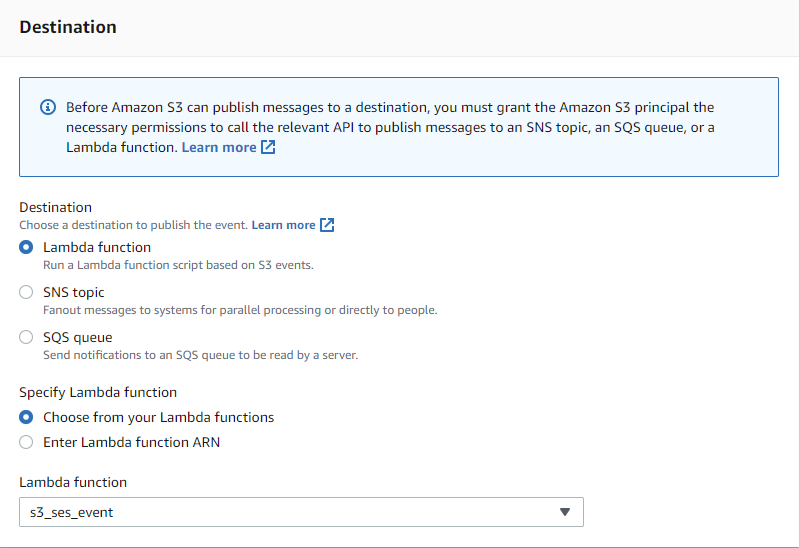

Now select **Save changes**.

Now, go back to the **Lambda** module that you were working on earlier and scroll down to the **Code** section. Enter the below script and click on **Deploy**. You also may notice that a **S3** trigger was added to your Lambda function from the prior step.

import boto3
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

def lambda_handler(event, context):
    ses = boto3.client("ses")
    s3 = boto3.client("s3")

    for i in event["Records"]:
        action = i["eventName"]
        ip = i["requestParameters"]["sourceIPAddress"]
        bucket_name = i["s3"]["bucket"]["name"]
        object = i["s3"]["object"]["key"]
        
    fileObj = s3.get_object(Bucket=bucket_name, Key=object)
    file_content = fileObj["Body"].read()
    
    sender = ""                                                                  # Update with your email address
    to = ""                                                                      # Update to the email addresses you plan to email too - For multi-emails change to ["email1", "email2"]
    subject = str(action) + ' Event from ' + bucket_name
    body = """
        <br>
        This email is to notify you regarding {} event.
        This object {} has been created.
        Source IP: {}
    """.format(action, object, ip)
    
    msg = MIMEMultipart()
    msg["Subject"] = subject
    msg["From"] = sender
    msg["To"] = to
    
    body_txt = MIMEText(body, "html")
    
    attachment = MIMEApplication(file_content)
    attachment.add_header("Content-Disposition", "attachment", filename="demo.txt")     # Make sure to change the filename and more importantly the extension (Ex: filename = "PO_123.csv")
    
    msg.attach(body_txt)
    msg.attach(attachment)
    
    response = ses.send_raw_email(Source=sender, Destinations=[to], RawMessage={"Data": msg.as_string()})
    
    return "Thanks"


# Create an Amazon Simple Email Service:

In the AWS Console, go to the **Amazon Simple Email Service (SES)** module and select **Create identity**.

Select **Email address** under the **Identity type** section and then enter an **Email address** under the **Identity details and then select **Create identity**.

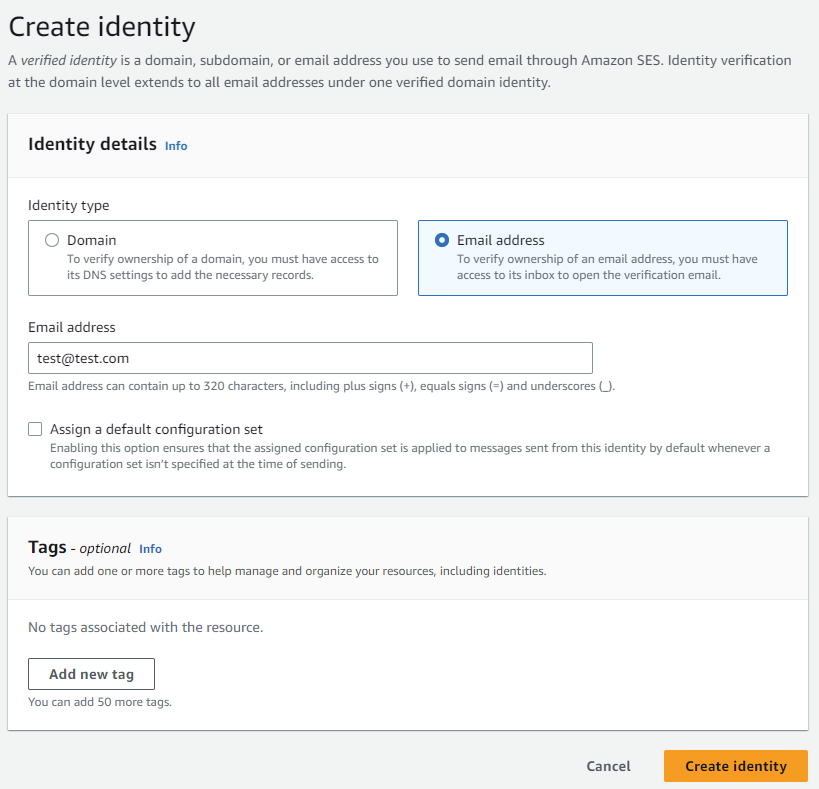

The owner of this email will then receive an email requesting them to click on an URL to confirm their identity. Note, this is for verifying the sender email address for this project, not the receiver. 

Once you have opened up the link, you will get a confirmation of verification. It might take a minute or two, so be patient.

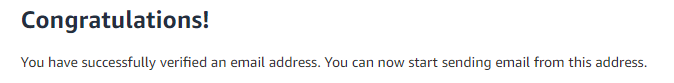




Something else that you may want to consider doing is increasing the timeout period before the lambda function fails. To do this, go to **Lambda** and in the associate item, scroll down to the **Configuration** tab and then select **General configurations** option. **Edit** and change the timeout input from 3 seconds to 5 seconds and then press **Save**.

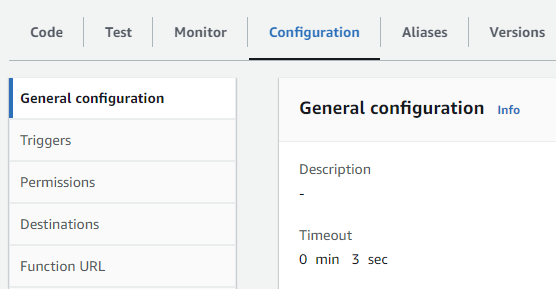

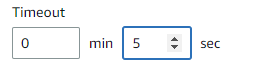

Now if you upload a file, you should see a log populated under the CloudWatch Logs. This can be found under the **Monitor** tab and then again under the **Logs** section. It might take a minute or two for the log to be received, so be patient.

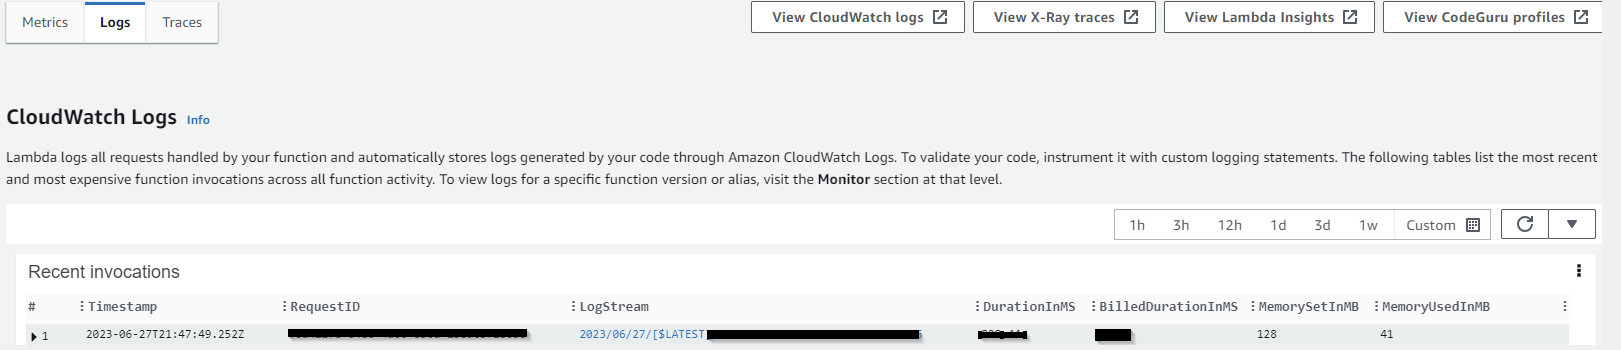

Furthermore, to validate that an email was actually sent, you can go to the Amazon SES module where you validated your email address and select **Account dashboard** from the left-hand panel. This dashboard will show how many emails were sent over time. As you can see, emails have been sent. 

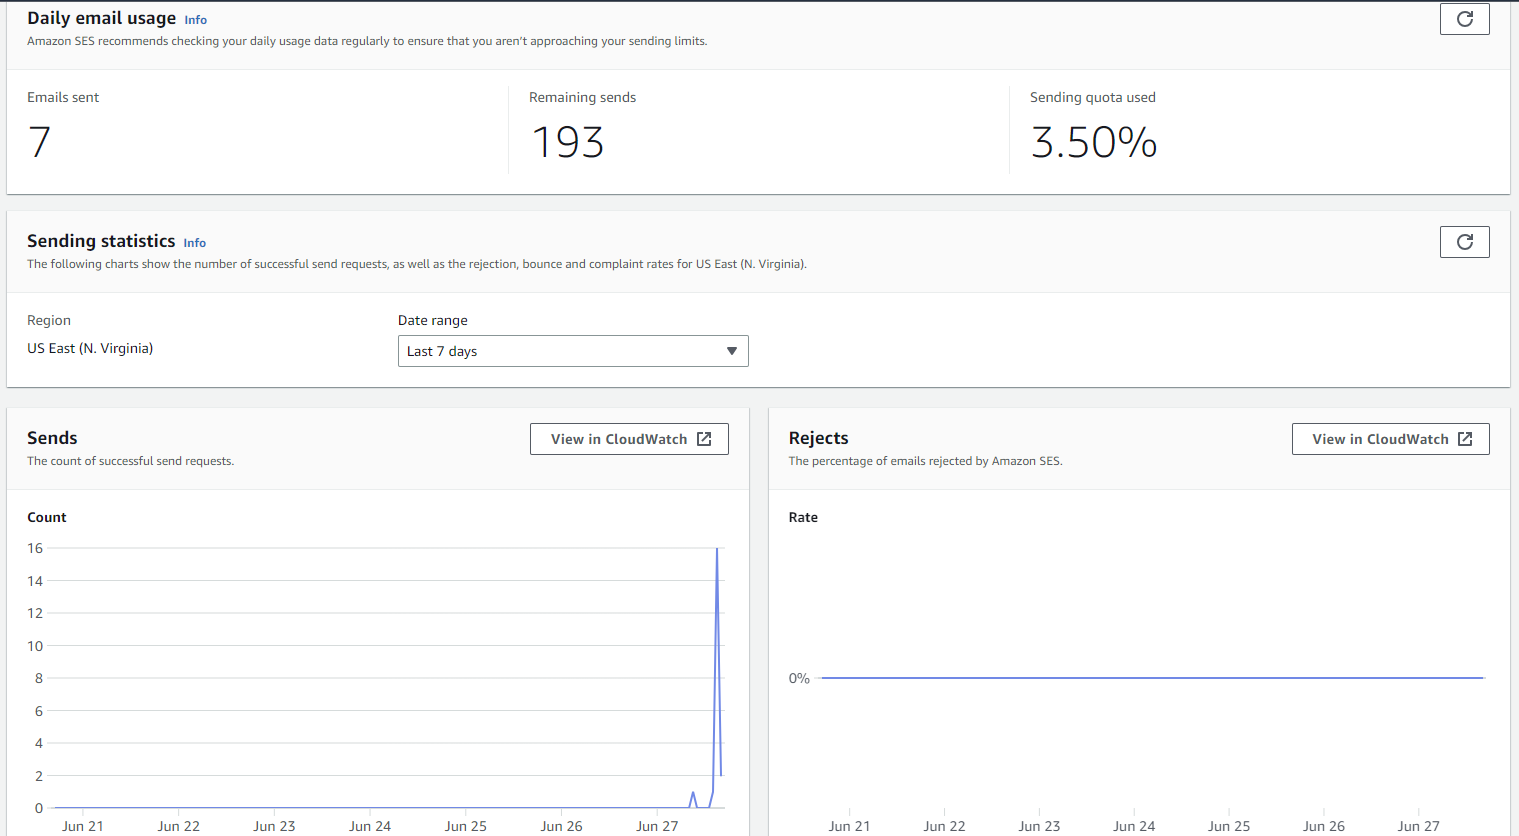